In [1]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np

Here we will explain the basics of PyTorch and Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem $y=ax+b$

The goal of linear regression is to fit a line to a set of points.

$$y=a_1x_1 + a_2x_2$$ where $x_2=1$.


This can be written as $y=Ax$ where $A$ is a vector of $a_1$ and $a_2$.

In [2]:
n=100

In [3]:
x = torch.ones(n,2)
x[:5]

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

In [4]:
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.3772,  1.0000],
        [ 0.3613,  1.0000],
        [ 0.3858,  1.0000],
        [ 0.5755,  1.0000],
        [-0.3631,  1.0000]])

In [5]:
a = torch.tensor([3.,2]); a

tensor([3., 2.])

In [6]:
y = x@a + torch.rand(n)

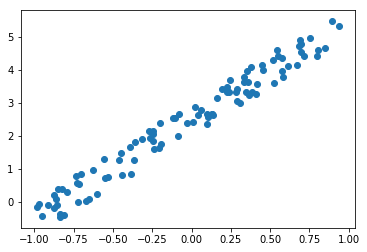

In [7]:
plt.scatter(x[:,0], y);

We want to find **parameters** (weights) `a` such that we minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [8]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Mathematically, this is equivalent to:$$MSE=\frac{\sum{(\hat{y} - y)^2}}{n}$$

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [9]:
a = torch.tensor([-1.,1])

In [10]:
y_hat = x@a
mse(y_hat, y)

tensor(6.4990)

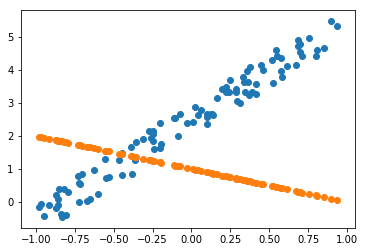

In [11]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [12]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [13]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [14]:
lr = 0.1
for t in range(100): update()

tensor(6.4990, grad_fn=<MeanBackward1>)
tensor(1.5133, grad_fn=<MeanBackward1>)
tensor(0.5078, grad_fn=<MeanBackward1>)
tensor(0.2153, grad_fn=<MeanBackward1>)
tensor(0.1288, grad_fn=<MeanBackward1>)
tensor(0.1031, grad_fn=<MeanBackward1>)
tensor(0.0955, grad_fn=<MeanBackward1>)
tensor(0.0933, grad_fn=<MeanBackward1>)
tensor(0.0926, grad_fn=<MeanBackward1>)
tensor(0.0924, grad_fn=<MeanBackward1>)


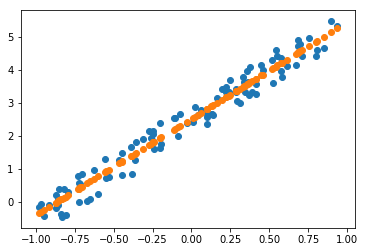

In [15]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],(x@a).detach());

## Animate it!

In [16]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [17]:
a = nn.Parameter(torch.tensor([-1.,1]))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
y_hat = (x@a).detach().numpy()
xs = x[:,0].detach().numpy()
line, = plt.plot(xs, y_hat)
plt.close()

def animate(i):
    update()
    line.set_ydata((x@a).detach().numpy())
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

# Using a (very simple) Neural Network

In [18]:
class LinearRegressionModel(nn.Module):

    def __init__(self, input_dim, output_dim):

        super().__init__() 
        # Calling Super Class's constructor
        self.linear = nn.Linear(input_dim, output_dim, bias=False)
        # nn.linear is defined in nn.Module

    def forward(self, x):
        # Here the forward pass is simply a linear function

        out = self.linear(x)
        return out

In [19]:
input_dim = 2
output_dim = 1
model = LinearRegressionModel(input_dim,output_dim)

criterion = nn.MSELoss()# Mean Squared Loss
lr = 0.1
optimiser = torch.optim.SGD(model.parameters(), lr = lr) #Stochastic Gradient Descent

epochs = 100

In [20]:
x_vals = x[:,0].data.numpy()
x_train = x

In [21]:
y_vals = y.data.numpy()
y_train = y.view(-1, 1)

In [22]:
for epoch in range(epochs):
    epoch +=1
    inputs = x_train
    labels = y_train

    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    with torch.no_grad():
        optimiser.step()
        optimiser.zero_grad()
    
    if epoch%10==0:
        print('epoch {}, loss {}'.format(epoch,loss.item()))

epoch 10, loss 1.4674183130264282
epoch 20, loss 0.47488173842430115
epoch 30, loss 0.20536410808563232
epoch 40, loss 0.12581029534339905
epoch 50, loss 0.10224924981594086
epoch 60, loss 0.09527037292718887
epoch 70, loss 0.09320319443941116
epoch 80, loss 0.09259088337421417
epoch 90, loss 0.09240949898958206
epoch 100, loss 0.09235577285289764


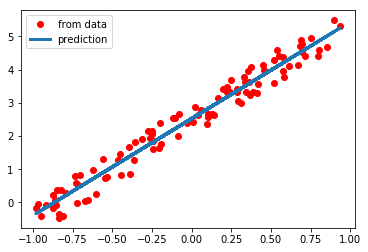

OrderedDict([('linear.weight', tensor([[2.9142, 2.5234]]))])


In [23]:
predicted=model(x_train).data.numpy()

plt.plot(x_vals, y_vals, 'ro', label = 'from data')
plt.plot(x_vals, predicted, linewidth=3, label = 'prediction')
plt.legend()
plt.show()
print(model.state_dict())

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocabulary

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.